# Logistic Regression from Scratch

Binary classifier that implements logistic regression. Notebook content is based off of lessons from Coursera Neural Networks and Deep Learning course.


**Note**: Logistic regression is _very easy_ to do in sklearn, but the process of creating this notebook was to develop a foundation for creating neural networks.

## Part 1: Functions

- `sigmoid()`: Activation function, converts weighted average of features to value between 0 and 1
    * Input
        - `z`: weighted average of features (i.e., w*X + b)
    * Output


- `initialize_with_zeros()`
    * Input
        - `dim`: number of features represented by data
    * Output
        - `w`: vector of zeros to represent relative weight of each feature (*n_features x 1*)
        - `b`: 0, to represent bias
        
        
- `propagate()`: forward propagation (compute cost associated with parameters), backward propagation (compute gradient based on error)
    * Input
        - `w`: vector representing weight of each feature (*n_features x 1*)
        - `b`: scalar representing bias
        - `X`: collection of features for each data sample (*n_features x n_samples*)
        - `Y`: label (1 or 0) for each data sample (*1 x n_samples*)
    * Output
        - `grads`: dictionary of gradients assigned to parameters to reduce cost
            * `grads["dw"]`: vector of gradients to apply to w (*n_features x 1*)
            * `grads["db"]`: scalar gradient to apply to b
        - `cost`: cost of current parameters


- `optimize()`: optimizes w and b through gradient descent
    * Input
        - `w`: vector representing weight of each feature (*n_features x 1*)
        - `b`: scalar representing bias
        - `X`: collection of features for each data sample (*n_features x n_samples*)
        - `Y`: label (1 or 0) for each data sample (*1 x n_samples*)
        - `num_interations`: number of iterations of the optimization loop
        - `learning_rate`: learning rate of the gradient descent update rule
        - `print_cost`: flag to print loss every 100 iterations (default False)
    * Output
        - `params`: dictionary containing weights w and bias b
        - `grads`: dictionary containing gradients (dw, db) with respect to cost function
        - `costs`: list of all costs computed during optimization, to plot learning curve


- `predict()`: predicts class for test data
    * Input
        - `w`: vector representing weight of each feature (*n_features x 1*)
        - `b`: scalar representing bias
        - `X`: collection of features for each data sample (*n_features x n_samples*)
    * Output
        - `Y_prediction`: class prediction (0 or 1) for each sample in X (*1 x n_samples*)


- `model()`: fits model and returns fit information
    * Input
        - `X_train`: collection of features for each data sample (*n_features x n_train_samples*)
        - `Y_train`: label (1 or 0) for each sample in X_train (*1 x n_train_samples*)
        - `X_test`: collection of features for each data sample (*n_features x n_test_samples*)
        - `Y_test`: label (1 or 0) for each sample in X_train (*1 x n_test_samples*)
        - `num_iterations`: number of iterations of the optimization loop (default 2000)
        - `learning_rate`: learning rate of the gradient descent update rule (default 0.5)
        - `print_cost`: flag to print loss every 100 iterations (default False)
    * Output
        - `d`: dictionary of model fit information
            * `d["costs"]`: cost of model parameters every 100 iterations
            * `d["Y_prediction_train"]`: predicted classes for training data
            * `d["Y_prediction_test"]`: predicted classes for testing data
            * `d["w"]`: fitted weights for each feature
            * `d["b"]`: fitted bias term for model
            * `d["learning_rate"]`: value from input
            * `d["num_iterations"]`: value from input



In [1]:
# Import necessary dictionaries
import numpy as np
from sklearn import datasets, model_selection
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sigmoid activation function
def sigmoid(z):
    """
    Compute sigmoid of z

    Input:
        z: A scalar or numpy array of any size.
    Output:
        s: sigmoid(z)
    """    
    s = 1/(1+np.exp(-z))
    
    return s

In [3]:
# Initialize w and b with zeros
def initialize_with_zeros(dim):
    """
    Create a vector of zeros of shape (dim, 1) for w and initialize b to 0.
    
    Input:
        dim: number of features in data
    Output:
        w: initialized vector representing feature weights (dim x 1)
        b: initialized scalar representing bias
    """

    w = np.zeros((dim, 1))
    b = 0
    
    return w, b

In [4]:
def propagate(w, b, X, Y):
    """
    Implement cost function for parameter values and compute gradient based on error

    Input:
        w: weights, numpy array (n_features x 1)
        b: bias, scalar
        X: data of size (n_features x n_samples)
        Y: true "label" vector (0, 1) of size (1 x n_samples)
    Output:
        cost: negative log-likelihood cost for logistic regression
        grads: dictionary containing gradients for w and b
            grads["dw"]: gradient of the loss with respect to w (n_features x 1)
            grads["db"]: gradient of the loss with respect to b (scalar)
    """
    
    m = X.shape[1]

    # Forward propagation: compute cost from X and parameters
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z) # activation
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y)*np.log(1-A)) # cost

    # Backward propagation: compute gradients for w and b
    dZ = A - Y
    dw = 1/m * np.dot(X, dZ.T)
    db = 1/m * np.sum(dZ)

    # Convert cost to scalar
    cost = np.squeeze(cost)
    assert(not np.isnan(cost))# If cost is nan, possible that sigmoid returned 1s, meaning features need scaling

    # Store gradients in dictionary
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [5]:
# Perform gradient descent to optimize parameters
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Perform gradient descent to optimize w and b
    
    Input:
        w: weights, numpy array (n_features x 1)
        b: bias, scalar
        X: data of size (n_features x n_samples)
        Y: true "label" vector (0, 1) of size (1 x n_samples)
        num_iterations: number of iterations of the optimization loop
        learning_rate: learning rate of the gradient descent update rule
        print_cost: True to print the loss every 100 steps
    Output:
        params: dictionary containing the weights w and bias b
        grads: dictionary containing the gradients of the weights (dw) and bias (db) with respect to the cost function
        costs: list of all the costs computed during the optimization (length: floor(n_samples/100)).
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [6]:
def predict(w, b, X):
    """
    Predict whether label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Input:
        w: weights, numpy array (n_features x 1)
        b: bias, scalar
        X: data of size (n_features x n_samples)
    Output:
        Y_prediction: numpy array (vector) containing predictions (0/1) for the examples in X (length: n_samples)
    """
    
    m = X.shape[1] # number of features
    Y_prediction = np.zeros((1,m)) # initialize vector for Y_prediction

    # Compute vector A predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [7]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Build logistic regression model
    
    Input:
        X_train: collection of features for each data sample (n_features x n_train_samples)
        Y_train: label (1 or 0) for each sample in X_train (1 x n_train_samples)
        X_test: collection of features for each data sample (n_features x n_test_samples)
        Y_test: label (1 or 0) for each sample in X_train (1 x n_test_samples)
        num_iterations: number of iterations of the optimization loop (default 2000)
        learning_rate: learning rate of the gradient descent update rule (default 0.5)
        print_cost: flag to print loss every 100 iterations (default False)
    Output:
        d: dictionary containing information about the model
    """

    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test errors
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    # Store model summary in dictionary d
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

## Part 2: Test model
Load breast cancer dataset and test model on classifying tumors as malignant (0) or benign (1).

In [8]:
# Load dataset
data = datasets.load_breast_cancer()

# Read x and y data
X = data['data']
Y = data['target']
target_names = data['target_names']

# Split into training and testing trials
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

# Min-max scaling of features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data so that it's in the format we want
#     X: n_features x n_trials
#     Y: 1 x n_trials
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1,-1)
Y_test = Y_test.reshape(1,-1)

# Fit model on data
d = model(X_train, Y_train, X_test, Y_test)

Train accuracy: 98.12206572769954 %
Test accuracy: 96.5034965034965 %


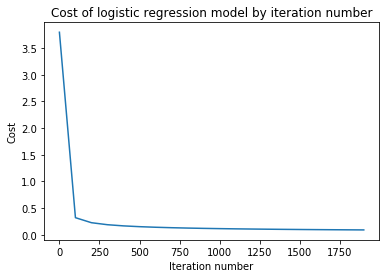

In [9]:
# Create plot of cost vs. iteration number

# x_plot = iteration number; y_plot = cost
x_plot = np.arange(0, d["num_iterations"], 100)
y_plot = d["costs"]

# Generate plot
plt.figure()
plt.plot(x_plot, y_plot)
plt.title('Cost of logistic regression model by iteration number')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()